<div align= "justify" dir="rtl" markdown=1>
<font face="XB Nazanin" size=3 markdown=1>
   
   </ul>
    دادگان در نظر گرفته‌شده برای این فاز پروژه مجموعه‌ای پردازش‌شده از اطلاعات فیلم‌های سینمایی موجود در  
    <a href="https://www.kaggle.com/rounakbanik/the-movies-dataset">این</a>
    مجموعه‌دادگان از وبسایت
    Kaggle
    می‌باشد. بررسی تحقیقات و پروژه‌های پیاده‌سازی شده بر این دادگان می‌تواند منبع خوبی برای یادگیری سیستم‌های توصیه‌گر و یا بازیابی اطلاعات باشد.
  </p>  
  <br>
هر یک از جداول موجود در پوشه‌ی
<code style="font-size:0.9em">data</code>
شامل نام، توصیف کوتاه فیلم، ژانر و وضعیت محبوبیت هر فیلم می‌باشد. برای فیلم‌هایی که میانگین آرائ کاربران به آنها بیشتر از مقدار میانه‌ی امتیاز همه‌ی فیلم‌ها بوده است برچسب popular 
و برای آنهایی که امتیاز کمتری از این مقدار داشته‌اند برچسب unpopular 
 تعلق گرفته است. همچنین به منظور ساده‌سازی کار با داده، از میان ژانر‌های ذکر شده برای هر فیلم، کلیدی‌ترین ژانر انتخاب شده است. در هر یک از بخش‌های این پروژه از 
<code style="font-size:0.9em">train.csv.gz</code>
برای آموزش و اعتبارسنجی و از 
<code style="font-size:0.9em">test.csv.gz</code>
برای آزمون مدل‌های خود استفاده کنید.

<h2>
    آماده‌سازی پروژه
</h2>
ابتدا تمامی کتاب‌خانه‌های مورد نیاز را نصب کرده و توابع مورد نیاز خود را import کنید (درصورت استفاده از کتاب‌خانه‌های جانبی آنها را به انتهای مستند
<code style="font-size:0.9em">requirements.txt</code>
بیافزایید):
</font>
</div>

In [1]:
# install dependencies
!pip install -r requirements.txt

In [1]:
# import dependencies 
from src import preprocessor, clustering, classification
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.manifold import TSNE
import seaborn as sns
import numpy as np
import re

<div align= "justify" dir="rtl" markdown=1>
<font face="XB Nazanin" size=3 markdown=1>
<h2>
آماده‌سازی دادگان
</h2>
    ابتدا مجموعه‌ی دادگان آموزشی و آزمون را بارگذاری کنید: 
  
</font>
</div>

In [2]:
# load up the data
train_data = pd.read_csv('data/train.csv.gz', compression='gzip')
test_data = pd.read_csv('data/test.csv.gz', compression='gzip')

train_data.head(2) # see how the data looks!

title                                               plot  \
0   Grumpier Old Men  A family wedding reignites the ancient feud be...   
1  Waiting to Exhale  Cheated on, mistreated and stepped on, the wom...   

   rating    genre popularity  
0     6.5  Romance    popular  
1     6.1  Romance    popular

<div align= "justify" dir="rtl" markdown=1>
<font face="XB Nazanin" size=3 markdown=1>
همانطور که می‌دانید پیش از اعمال الگوریتم‌های گوناگون یادگیری ماشین بر این دادگان نیاز‌مندیم که ضمن تمیز‌کردن اطلاعات، آنها را به صورت خاص برای الگوریتم مورد نظر آماده کنیم (برای مثال برای دسته‌بندی دادگان لازم است اطلاعات ورودی به صورت برداری و برچسب‌ها به صورت عددی نمایش داده‌شوند). در این پروژه 
<u>
متن حاصل از الصاق نام و شرح ماجرای هر فیلم را به عنوان معرف آن فیلم و ورودی مسائل در نظر می‌گیریم   
</u>
و پس از اعمال پیش‌پردازش‌های لازم بر آن (حذف علائم نگارشی و ...) به کمک دو الگوریتم مختلف
برای هر فیلم نمایشی برداری به دست می‌آوریم.

</p>
  فرآیند آماده‌سازی دادگان و حل مسئله‌ی مورد نظر هرچند در حالت کلی می‌تواند بسیار پیچیده‌باشد، اما به دلیل حضور در تمامی پروژه‌های داده‌محور 
  <i><a href="https://en.wikipedia.org/wiki/Pipeline_(computing)">pipeline</a></i>
  های مختلفی برای تسریع پیاده‌سازی آن وجود داشته و قابل استفاده‌است. یک پایپ‌لاین مناسب برای این پروژه می‌تواند 
  نسخه‌ی توسعه یافته در کتاب‌خانه‌ی 
  sklearn
  باشد. برای یادگیری نحوه‌ی به‌کار گیری این ابزار مشاهده‌ی 
   <a href="https://scikit-learn.org/stable/modules/compose.html#combining-estimators">
   مستندات رسمی
</a>
    sklearn و همچنین بررسی 
    <a href="https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf">
   این مقاله
</a>
    و 
  <a href="https://www.kaggle.com/baghern/a-deep-dive-into-sklearn-pipelines">
  این نوت‌بوک
</a>
    می‌تواند مفید باشد.
</p>
قطعه‌کد
<code style="font-size:0.9em">src.preprocessing</code>
شامل نمونه‌ی 
pipeline
مربوط به پیش‌پردازش دادگان این پروژه و یافتن نمایش برداری آنها به کمک دو الگوریتم 
TF-IDF ($vec_1$)
و
<a href="https://arxiv.org/abs/1301.3781">Word2Vec (W2V)</a> ($vec_2$)
می‌باشد.
هرچند نحوه‌ی کار الگوریتم 
W2V
در ادامه‌ی درس تدریس می‌شود، در صورتی که علاقه‌مندید درباره‌ی این الگوریتم بیشتر بدانید می‌توانید
<a href="https://www.youtube.com/watch?v=yexR53My2O4">
این ویدئو
</a>
و یا 
<a href="https://medium.com/@zafaralibagh6/a-simple-word2vec-tutorial-61e64e38a6a1">
این مقاله
</a>
را بررسی کنید. 
برای پیاده‌سازی این الگوریتم
از کتاب‌خانه‌ی 
<a href="https://radimrehurek.com/gensim/index.html">gensim</a>
استفاده شده‌است که علاوه بر این الگوریتم پیاده‌سازی الگوریتم‌های پرکاربرد دیگری را نیز در خود جای‌داده‌است. می‌توانید با مشاهده‌ی 
<a href="https://radimrehurek.com/gensim/models/word2vec.html">
مستندات
</a>
این کتاب‌خانه
نحوه‌ی تخصیص پارامتر‌های این الگوریتم را بررسی کنید. 

</p>
همانطور که می‌دانید اندازه‌ی ابعادی بردار‌های خروجی الگوریتم
TF-IDF
برابر تعداد کلمات موجود در 
vocabulary
می‌باشد. از طرف دیگر بردار‌های حاصل از این الگوریتم علاوه‌بر ابعاد بالا معمولا sparse می‌باشند. 
 بنابراین استفاده‌ی مستقیم از آنها معمولا نابهینه بوده و امکان کاهش ابعادی آنها بدون از دست رفتن زیاد اطلاعات وجود دارد
به همین منظور یک pipeline جداگانه برای محاسبه‌ی بردار‌های TF-IDF و کاهش ابعاد آنها به کمک 
<a href="https://en.wikipedia.org/wiki/Singular_value_decomposition">Singular Value Decomposition (SVD)</a>
در این پیاده‌سازی استفاده‌شده است. بررسی 
<a href="https://www.youtube.com/playlist?list=PLMrJAkhIeNNSVjnsviglFoY2nXildDCcv">
این سری ویدئو‌ای
</a>
می‌تواند برای یادگیری عمیق‌تر کاربرد SVD برای 
<a href="https://en.wikipedia.org/wiki/Principal_component_analysis">
تحلیل مؤلفه‌های اصلی 
</a>
دادگان مفید‌باشد.
</p>
در اینجا به کمک pipeline 
پیاده‌سازی شده، دادگان پروژه را برای بخش‌های بعدی آماده‌می‌کنیم. در صورت نیاز می‌توانید پیاده‌سازی pipeline و یا پارامتر‌های آن‌را برای بهبود کیفیت بردار‌های یافته شده تغییر دهید. 
</font>
</div>


In [37]:
# setup preprocessor
preprocessor.set_params(
    vectorizer__n_components=256, # dimensionality of the word vectors
    vectorizer__w2v={
        'iter':128, # number of training iterations of the w2v model
        'min_count':2, # all words with total frequency lower than this will be ignored
    },
)
preprocessor.fit(train_data)
train_data = preprocessor.transform(train_data)
test_data = preprocessor.transform(test_data)


In [2]:
# train_data = pd.read_csv('data2/processed_train.csv.gz', compression='gzip')
# test_data = pd.read_csv('data2/processed_test.csv.gz', compression='gzip')


<div align= "justify" dir="rtl">
<font face="XB Zar" size=3>
   حال می‌توانیم برای بررسی درستی الگوریتم‌های بخش‌های دیگر و یافتن پارامتر‌های بهتر برای آنها، بخشی از دادگان آموزشی (مثلا ۱۰٪) را به دلخواه  برای درستی سنجی کنار گذاریم. 
    همانطور که می‌دانید راه‌کار‌های پیچیده‌تری چون
<a href="https://machinelearningmastery.com/k-fold-cross-validation/#:~:text=Cross%2Dvalidation%20is%20a%20resampling,k%2Dfold%20cross%2Dvalidation.">    
    k-fold cross validation
    </a>
   هم برای اعتبار‌سنجی عمل‌کرد الگوریتم‌های یادگیری ماشین و انتخاب بهینه‌تر پارامتر‌های آنها وجود دارد و به جای این‌کار می‌توانید از آنها استفاده‌کنید. 
</font>
</div>

In [1]:
validation_fraction = 0.1
mask = np.random.rand(len(train_data)) < (1-validation_fraction)
val_split = train_data.iloc[~mask]
train_split = train_data.iloc[mask]

NameError: name 'np' is not defined

<div align= "justify" dir="rtl">
<font face="XB Zar" size=3>
تصور کنید که می‌خواهید سامانه‌ای برای بازیابی اطلاعات مربوط به فیلم‌ها پیاده‌سازی کنید. روز به روز فیلم‌های جدیدی به بازار عرضه می‌شوند و در صورتی که بتوانید به صورت خودکار، بر حسب توضیحات فیلم حدس بزنید که فیلمی که جدیدا به سامانه‌ی شما اضافه شده است محبوب خواهد بود یا نه و یا اینکه بیشتر به کدام ژانر سینمایی شبیه‌است؛ علاوه‌بر کاربرد‌های گوناگون، می‌توانید بر اساس این اطلاعات با ترتیب بهتری اطلاعات بازیابی‌شده را به کاربران خود نمایش‌دهید.
    با این نگاه، در ادامه به حل هر‌یک از این مسائل می‌پردازیم.
</font>
</div>

<div align= "justify" dir="rtl">
<font face="XB Zar" size=3>
    <h1>دسته‌بندی
      </h1>
    در این بخش می‌خواهیم به کمک الگوریتم‌های دسته‌بندی، محبوبیت نسبی هر فیلم را بر اساس نام و توضیحاتش پیش‌بینی کنیم. همان‌طور که می‌دانید عمل‌کرد مناسب الگوریتم دسته‌بند، بستگی تنگاتنگی با نمایش اطلاعات ورودی خود دارد. هرچقدر نمایش برداری اطلاعات ورودی الگوریتم بهتر باشد، عمل‌کرد الگوریتم نیز معمولا بهتر خواهد بود. بر این اساس در این بخش، پس از پیاده‌سازی الگوریتم‌های نام‌برده‌شده به بررسی کیفیت نمایش برداری حاصل از دو الگوریتم 
    $vec_1$
    و
    $vec_2$
    می‌پردازیم.
    
</font>
</div>

<div align= "justify" dir="rtl">
<font face="XB Zar" size=3>
    <h2>
        پیاده‌سازی دسته‌بندها
    </h2>
    مطابق توضیحات، پیاده‌سازی مربوط به هر یک از الگوریتم‌های نام‌برده‌شده را در
<code style="font-size:0.9em">src.classification</code>
    تکمیل کرده و سپس با اعتبار‌سنجی الگوریتم‌های آموزش دیده با هایپر‌پارامتر‌های مختلف، بهترین تنظیمات هر الگوریتم برای دست‌یابی به دقت بالا‌تر در دسته‌بندی بر اساس هر یک از دو نمایش برداری موجود را بیابید.
 پینهاد می‌کنیم برای جست‌و‌جو در فضای هایپر‌پارامتر‌ها و اعتبار‌سنجی الگوریتم‌ها از ابزار
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV">
    GridSearchCV
    </a>
    کتاب‌خانه‌ی
    sklearn
    استفاده‌کنید.
</font>
</div>

  <div align= "justify" dir="rtl">
<font face="XB Zar" size=3>
    <h3>Naive Bayes
    </h3>
    الگوریتم
     Naive Bayes
    را در
    <code style="font-size:0.9em">src.classification.models</code>
    از پایه پیاده‌سازی کرده 
     و با اعتبار‌سنجی الگوریتم (با توزیع‌های احمالاتی مختلف و یا تنظیمات دیگر) بهترین تنظیمات الگوریتم برای دریافت دقت عمل‌کرد بیشتر بر دادگان را گزارش کنید.
    برای مشاهده‌ی نمونه پیاده‌سازی این الگوریتم می‌توانید
    <a href="https://medium.com/@srishtisawla/introduction-to-naive-bayes-for-classification-baefefb43a2d">
    این مقاله
    </a>
را بررسی کنید.
    </font>
</div>

In [3]:
prediction = [list()]*4
prediction2 = [list()] * 3

In [4]:
vec1Train = []
vec2Train = []
labelsTrain = []
genreTrain = []
for i in range(len(train_data)):
    vec1Train.append(np.array(train_data['vec_1'][i][1:-1].split(', '), dtype=float))
    vec2Train.append(np.array(train_data['vec_2'][i][1:-1].split(), dtype=float))
    labelsTrain.append(np.array(train_data['popularity'][i], dtype=int))
    genreTrain.append(np.array(train_data['genre'][i], dtype=int))
vec1Train = np.array(vec1Train)
vec2Train = np.array(vec2Train)
labelsTrain = np.array(labelsTrain)
genreTrain = np.array(genreTrain)

vec1Test = []
vec2Test = []
labelsTest = []
for i in range(len(test_data)):
    vec1Test.append(np.array(test_data['vec_1'][i][1:-1].split(', '), dtype=float))
    vec2Test.append(np.array(test_data['vec_2'][i][1:-1].split(), dtype=float))
    labelsTest.append(np.array(test_data['popularity'][i], dtype=int))
vec1Test = np.array(vec1Test)
vec2Test = np.array(vec2Test)
labelsTest = np.array(labelsTest)


In [35]:
answer = [["accuracy for gaussian vec1: "], ["accuracy for bernoulli vec1: "], ["accuracy for gaussian vec2: "], ["accuracy for bernoulli vec2: "]]
NBmodelG1 = classification.NaiveBayes('gaussian')
NBmodelG1.fit(vec1Train, labelsTrain)
count = 0
prediction[0] = [list()] * 4
for i in range(4):
    prediction[0][i] = []
for j in range(len(vec1Test)):
    l = NBmodelG1.predict(vec1Test[j])
    prediction[0][0].append(l)
    if l == labelsTest[j]:
        count += 1
answer[0].append((count/len(vec1Test)))
print(answer[0][0] + str(answer[0][1]))  

NBmodelB1 = classification.NaiveBayes('bernoulli')
NBmodelB1.fit(vec1Train, labelsTrain)
count = 0
for j in range(len(vec1Test)):
    l = NBmodelB1.predict(vec1Test[j])
    prediction[0][1].append(l)
    if l == labelsTest[j]:
        count += 1
answer[1].append((count/len(vec1Test)))
print(answer[1][0] + str(answer[1][1]))

NBmodelG2 = classification.NaiveBayes('gaussian')
NBmodelG2.fit(vec2Train, labelsTrain)
count = 0
for j in range(len(vec2Test)):
    l = NBmodelG2.predict(vec2Test[j])
    prediction[0][2].append(l)
    if l == labelsTest[j]:
        count += 1
answer[2].append((count/len(vec2Test)))
print(answer[2][0] + str(answer[2][1])) 

NBmodelB2 = classification.NaiveBayes('bernoulli')
NBmodelB2.fit(vec2Train, labelsTrain)
count = 0
for j in range(len(vec2Test)):
    l = NBmodelB2.predict(vec2Test[j])
    prediction[0][3].append(l)
    if l == labelsTest[j]:
        count += 1
answer[3].append((count/len(vec2Test)))
print(answer[3][0] + str(answer[3][1])) 

# todo: fit & validate the model to achieve the best accuracy on training data (vec_1 & vec_2)
# todo: report best settings
# target accuracy>0.6
maxi = 0
for i in range(4):
    if answer[i][1] > maxi:
        maxi = answer[i][1]
        index = i
answer = answer[index][0].split()
print("best setting: " + answer[2] +" "+ answer[3][:-1])

accuracy for gaussian vec1: 0.5774647887323944
accuracy for bernoulli vec1: 0.5427565392354124
accuracy for gaussian vec2: 0.5915492957746479
accuracy for bernoulli vec2: 0.579979879275654
best setting: gaussian vec2



  <div align= "justify" dir="rtl">
<font face="XB Zar" size=3>
    <h3>kNN
    </h3>
    الگوریتم
     kNN
    را در
    <code style="font-size:0.9em">src.classification.models</code>
    از پایه پیاده‌سازی کرده 
     و با اعتبار‌سنجی الگوریتم (با $k$ های مختلف و یا تنظیمات دیگر) بهترین تنظیمات الگوریتم برای دریافت دقت عمل‌کرد بیشتر بر دادگان را گزارش کنید.
    برای مشاهده‌ی نمونه پیاده‌سازی این الگوریتم می‌توانید
    <a href="https://medium.com/capital-one-tech/k-nearest-neighbors-knn-algorithm-for-machine-learning-e883219c8f26">
    این مقاله
    </a>
را بررسی کنید.
    </font>
</div>

In [52]:
KNNmodel1 = classification.KNN()
KNNmodel1.fit(vec1Train, labelsTrain)
maximum = 0
index = 15
param = [31, 51, 71]
prediction[1] = [list()] * 6
for i in range(6):
    prediction[1][i] = []
pi = 0
for i in param:
    count = 0
    for j in range(len(vec1Test)):
        l = KNNmodel1.predict(vec1Test[j], i)
        prediction[1][pi].append(l)
        if l == labelsTest[j]:
            count += 1
    accuracy = count/len(vec1Test)
    print("accuracy in vec1 for k = " + str(i) + " is "+str(accuracy))
    pi += 1
    if accuracy <= maximum:
        break
    else:
        maximum = accuracy
        index = i
    
print("best setting for vec1: k = " + str(index) + ", accuracy = "+str(maximum))
KNNmodel2 = classification.KNN()
maximum2 = 0
index2 = 15
KNNmodel2.fit(vec2Train, labelsTrain)
for i in param:    
    count = 0
    for j in range(len(vec2Test)):
        l = KNNmodel2.predict(vec2Test[j], i)
        prediction[1][pi].append(l)
        if l == labelsTest[j]:
            count += 1
    accuracy = count/len(vec2Test)
    print("accuracy in vec2 for k = " + str(i) + " is "+str(accuracy))
    pi += 1
    if accuracy <= maximum2:
        break
    else:
        maximum2 = accuracy
        index2 = i
    
print("best setting for vec2: k = " + str(index2) + ", accuracy = "+str(maximum2))

if maximum2 > maximum:
    print('best setting is for vec2 and k = ' + str(index2))
else:
    print('best setting is for vec1 and k = ' + str(index))
# todo: fit & validate the model to achieve the best accuracy on training data (vec_1 & vec_2)
# todo: report best settings
# target accuracy>0.6

accuracy in vec1 for k = 31 is 0.6016096579476862
accuracy in vec1 for k = 51 is 0.6051307847082495
accuracy in vec1 for k = 71 is 0.5905432595573441
best setting for vec1: k = 51, accuracy = 0.6051307847082495
accuracy in vec2 for k = 31 is 0.6006036217303823
accuracy in vec2 for k = 51 is 0.6066398390342053
accuracy in vec2 for k = 71 is 0.6151911468812877
best setting for vec2: k = 71, accuracy = 0.6151911468812877
best setting is for vec2 and k = 71


<div align= "justify" dir="rtl">
  <font face="XB Zar" size=3>
    <h3>SVM
    </h3>
      الگوریتم SVM 
      را برای حالت 
    <a href="https://towardsdatascience.com/support-vector-machines-soft-margin-formulation-and-kernel-trick-4c9729dc8efe">حاشیه نرم</a>
    در 
    <code style="font-size:0.9em">src.classification.models</code> 
       با کمک
      توابع کتاب‌خانه‌های موجود چون
      <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">
      sklearn
      </a>
      پیاده‌سازی
   و با اعتبار‌سنجی الگوریتم (بامقادیر مختلف $c$ و یا تنظیمات دیگر) بهترین تنظیمات الگوریتم برای دریافت دقت عمل‌کرد بیشتر بر دادگان را گزارش کنید.  
    </font>
</div>

In [33]:
maximumS = 0
indexS = 2
c = [0.1, 1.0, 2.0]
prediction[2] = []
pi = 0
for i in c:
    SVMmodel1 = classification.SVM(i)
    SVMmodel1.fit(vec1Train, labelsTrain)
    count = 0
    l = SVMmodel1.predict(vec1Test)
    prediction[2].append(list(l))
    for j in range(len(vec1Test)):
        if l[j] == labelsTest[j]:
            count += 1
    accuracy = count/len(vec1Test)
    print("accuracy in vec1 for c = " + str(i) + " is "+str(accuracy))
    if accuracy <= maximumS:
        break
    else:
        maximumS = accuracy
        indexS = i
print("best setting for vec1: c = " + str(indexS) + ", accuracy = "+str(maximumS))
indexS2 = 2
maximumS2 = 0
for i in c:
    SVMmodel2 = classification.SVM(i)
    SVMmodel2.fit(vec2Train, labelsTrain)
    count = 0
    l = SVMmodel2.predict(vec2Test)
    prediction[2].append(list(l))
    for j in range(len(vec2Test)):
        if l[j] == labelsTest[j]:
            count += 1
    accuracy = count/len(vec2Test)
    print("accuracy in vec2 for c = " + str(i) + " is "+str(accuracy))
    if accuracy <= maximumS2:
        break
    else:
        maximumS2 = accuracy
        indexS2 = i
print("best setting for vec1: c = " + str(indexS2) + ", accuracy = "+str(maximumS2))

if maximumS2 > maximumS:
    print('best setting is for vec2 and k = ' + str(indexS2))
else:
    print('best setting is for vec1 and k = ' + str(indexS))
# todo: fit & validate the model to achieve the best accuracy on training data (vec_1 & vec_2)
# todo: report best settings
# target accuracy>0.6

accuracy in vec1 for c = 0.1 is 0.6227364185110664
accuracy in vec1 for c = 1.0 is 0.6348088531187123
accuracy in vec1 for c = 2.0 is 0.6312877263581489
best setting for vec1: c = 1.0, accuracy = 0.6348088531187123
accuracy in vec2 for c = 0.1 is 0.635814889336016
accuracy in vec2 for c = 1.0 is 0.6388329979879276
accuracy in vec2 for c = 2.0 is 0.6277665995975855
best setting for vec1: c = 1.0, accuracy = 0.6388329979879276
best setting is for vec2 and k = 1.0


  <div align= "justify" dir="rtl">
<font face="XB Zar" size=3>
    <h3>Neural Network
    </h3>
    شبکه‌ی عصبی مبنی بر معماری
<a href="https://en.wikipedia.org/wiki/Multilayer_perceptron">
    Multilayer Perceptron
   </a>
    را با کمک کتاب‌خانه‌های موجود (همچون 
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html">sklearn‌</a>)
    در 
    <code style="font-size:0.9em">src.classification.models</code>
    پیاده‌سازی کنید. 
      انتخاب پارامتر‌های مختلف (از جمله تعداد لایه‌ها, گره‌های هر لایه و ...) به عهده خودتان است  اما سعی کنید با اعتبار‌سنجی الگوریتم با 
    <a href="https://towardsdatascience.com/optimizers-for-training-neural-network-59450d71caf6">بهینه‌ساز‌ها</a>
    , <a href="https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0"> توابع 
    فعال‌ساز</a>
    و تعداد لایه‌های مختلف و یا تنظیمات دیگر، بهترین تنظیمات این الگوریتم را برای دست‌یابی به دقت عمل‌کرد بیشتر بر دادگان آموزشی را یافته و آن‌را گزارش کنید.
  </font>
</div>

In [27]:
mi=[300,500]
hls = [(100, 10, 1), (100, 20, 5)]
indexMI1 = 300
indexHLS1 = (100, 40, 5)
prediction[3] = []
maximumNN1 = 0
for i in mi:
    for k in hls:
        NNmodel1 = classification.NeuralNetwork(i, k)
        NNmodel1.fit(vec1Train, labelsTrain)
        count = 0
        l = NNmodel1.predict(vec1Test)
        prediction[3].append(list(l))
        for j in range(len(vec1Test)):
            if l[j] == labelsTest[j]:
                count += 1
        accuracy = count/len(vec1Test)
        print("accuracy in vec1 for max_iter = " + str(i) + ", hidden_layer_sizes "+str(k) + " is "+str(accuracy))
        if accuracy >= maximumNN1:
            maximumNN1 = accuracy
            indexMI1 = i
            indexHLS1 = k
print("best accuracy for vec1 is max_iter = " + str(indexMI1) + ", hidden_layer_sizes "+str(indexHLS1) + " is "+str(maximumNN1))
 
indexMI2 = 300
indexHLS2 = (100, 10, 5)
maximumNN2 = 0
for i in mi:
    for k in hls:
        NNmodel2 = classification.NeuralNetwork(i, k)
        NNmodel2.fit(vec2Train, labelsTrain)
        count = 0
        l = NNmodel2.predict(vec2Test)
        prediction[3].append(list(l))
        for j in range(len(vec2Test)):
            if l[j] == labelsTest[j]:
                count += 1
        accuracy = count/len(vec2Test)
        print("accuracy in vec2 for max_iter = " + str(i) + ", hidden_layer_sizes "+str(k) + " is "+str(accuracy))
        if accuracy >= maximumNN2:
            maximumNN2 = accuracy
            indexMI2 = i
            indexHLS2 = k
print("best accuracy for vec2 is max_iter = " + str(indexMI2) + ", hidden_layer_sizes "+str(indexHLS2) + " is "+str(maximumNN2))

if maximumNN2 > maximumNN1:
    print('best setting is for vec2, max_iter = ' + str(indexMI2) + ", hidden_layer_sizes "+str(indexHLS2))
else:
    print('best setting is for vec1, max_iter = ' + str(indexMI1) + ", hidden_layer_sizes "+str(indexHLS1))
    
# todo: fit & validate the model to achieve the best accuracy on training data (vec_1 & vec_2)
# todo: report best settings
# target accuracy>0.6

accuracy in vec1 for max_iter = 300, hidden_layer_sizes (100, 10, 1) is 0.6378269617706237
accuracy in vec1 for max_iter = 300, hidden_layer_sizes (100, 20, 5) is 0.6388329979879276
accuracy in vec1 for max_iter = 500, hidden_layer_sizes (100, 10, 1) is 0.6393360160965795
accuracy in vec1 for max_iter = 500, hidden_layer_sizes (100, 20, 5) is 0.6348088531187123
best accuracy for vec1 is max_iter = 500, hidden_layer_sizes (100, 10, 1) is 0.6393360160965795
accuracy in vec2 for max_iter = 300, hidden_layer_sizes (100, 10, 1) is 0.6187122736418511
accuracy in vec2 for max_iter = 300, hidden_layer_sizes (100, 20, 5) is 0.6262575452716298
accuracy in vec2 for max_iter = 500, hidden_layer_sizes (100, 10, 1) is 0.6237424547283702
accuracy in vec2 for max_iter = 500, hidden_layer_sizes (100, 20, 5) is 0.6247484909456741
best accuracy for vec2 is max_iter = 300, hidden_layer_sizes (100, 20, 5) is 0.6262575452716298
best setting is for vec1, max_iter = 500, hidden_layer_sizes (100, 10, 1)


<div align= "justify" dir="rtl">
<font face="XB Zar" size=3>
    <h2>ارزیابی
    </h2>
    با تکمیل  
    <code style="font-size:0.9em">src.classification.evaluation</code> 
    معیار‌های ارزیابی خواسته‌شده‌ی زیر را پیاده‌سازی کنید: <br>
    <ul>
        <li> Accuracy</li>
        <li> $F_۱$ با $\beta = ۱, \alpha = \dfrac{۱}{۲}$</li>
        <li> <a href="https://medium.com/@raghaviadoni/evaluation-metrics-i-precision-recall-and-f1-score-3ec25e9fb5d3#:~:text=Precision%20basically%20tells%20us%20that,or%20found%20by%20our%20model.&text=This%20is%20thus%20a%20high%20precision%20model(value%20of%20precision,more%20than%20that%20of%20recall).">Precision و Recall</a> برای هر کلاس</li>
    </ul>
سپس با کمک تابع
    <code style="font-size:0.9em">evaluation</code> 
    عمکرد هر یک از الگوریتم‌های پیاده‌سازی شده با بهترین تنظیماتی که یافتید را
    <u>پس از آموزش با تمامی دادگان آموزشی</u>
    ، بر دادگان آزمون به دست آورده و جداول زیر را تکمیل کنید.
    (<b>دقت کنید برای ارزیابی پارامتر‌ها در بخش ‌های قبل تنها از معیار Accuracy بر روی داده اعتبارسنجی استفاده کنید)</b>
    <br>
    <b>توجه:</b>
    در پیاده‌سازی معیار‌ها مجاز به استفاده از کتابخانه‌های موجود (مانند 
    <a href="https://scikit-learn.org/stable/modules/model_evaluation.html">sklean</a>)
    هستید.
    </font>
    </font>
</div>

In [53]:
NB1 = classification.evaluate(labelsTest, prediction[0][0])
KNN1 = classification.evaluate(labelsTest, prediction[1][1])
SVM1 = classification.evaluate(labelsTest, prediction[2][1])
NN1 = classification.evaluate(labelsTest, prediction[3][2])

NB2 = classification.evaluate(labelsTest, prediction[0][2])
KNN2 = classification.evaluate(labelsTest, prediction[1][5])
SVM2 = classification.evaluate(labelsTest, prediction[2][4])
NN2 = classification.evaluate(labelsTest, prediction[3][5])

In [55]:
l1 = [list] * 5
l2 = [list] * 5
for i in range(5):
    l2[i] = []
    l1[i] = []
for i in NN1.keys():
    l1[0].append(i)
    l1[1].append(NB1[i])
    l1[2].append(KNN1[i])
    l1[3].append(SVM1[i])
    l1[4].append(NN1[i])
    
    l2[0].append(i)
    l2[1].append(NB2[i])
    l2[2].append(KNN2[i])
    l2[3].append(SVM2[i])
    l2[4].append(NN2[i])
    
    
df1 = pd.DataFrame (l1).transpose()
df1.columns = ['funcs','NB','KNN', 'SVM', 'NN']
df2 = pd.DataFrame (l2).transpose()
df2.columns = ['funcs','NB','KNN', 'SVM', 'NN']
print('vec1:')
df1

vec1:


funcs        NB       KNN       SVM        NN
0       ACC  0.577465  0.605131  0.634809  0.639336
1    F1_pos  0.577154  0.617438  0.620429  0.625628
2  prec_pos  0.577154  0.617438  0.620429  0.625628
3  reca_pos  0.314068  0.378408  0.536532  0.543075
4    F1_neg  0.577569  0.600281  0.644351   0.64849
5  prec_neg  0.577569  0.600281  0.644351   0.64849
6  reca_neg  0.802988  0.799253  0.718954  0.721755

In [56]:
print('vec2')
df2

vec2


funcs        NB       KNN       SVM        NN
0       ACC  0.591549  0.615191  0.638833  0.626258
1    F1_pos  0.541966  0.601064  0.626429  0.599771
2  prec_pos  0.541966  0.601064  0.626429  0.599771
3  reca_pos  0.739368  0.492912  0.537623  0.570338
4    F1_neg  0.675712  0.623786  0.646961  0.646953
5  prec_neg  0.675712  0.623786  0.646961  0.646953
6  reca_neg  0.464986  0.719888   0.72549  0.674136

<div align= "justify" dir="rtl">
<font face="XB Zar" size=3>
    <h2>مصور سازی 
    </h2>
    در این قسمت، از شما خواسته می‌شود که برای دسته‌بند‌های فوق (هرکدام ۲/۵ نمره) پس از طی کردن مراحل آموزش، برای مجموعه داده آزمون برچسب‌های پیش‌بینی شده را با برچسب‌های واقعی با استفاده از دو عدد (به همراه خط دسته‌بند در صورت وجود) مصورسازی برای هرکدام مقایسه کنید. برای اینکار ابتدا بایستی با استفاده از روش‌های کاهش ابعاد 
    <a href="https://medium.com/@aptrishu/understanding-principle-component-analysis-e32be0253ef0">PCA</a>
    و یا 
    <a href="https://medium.com/@violante.andre/an-introduction-to-t-sne-with-python-example-47e6ae7dc58f">tSNE</a> 
    مجموعه داده‌ها را به فضای برداری دو یا سه بعدی ببرید تا امکان مصورسازی فراهم شود. همچنین استفاده از کتابخانه‌های موجود برای کاهش ابعاد و مصورسازی مانعی ندارد.
    </font>
</div>

In [62]:
m = TSNE(learning_rate = 50, random_state=1)
vec1TSNE = m.fit_transform(vec1Test)
vec2TSNE = m.fit_transform(vec2Test)
vec1X = vec1TSNE[:, 0]
vec1Y = vec1TSNE[:, 1]
vec2X = vec2TSNE[:, 0]
vec2Y = vec2TSNE[:, 1]

[Text(0.5, 1.0, 'NN vec2')]

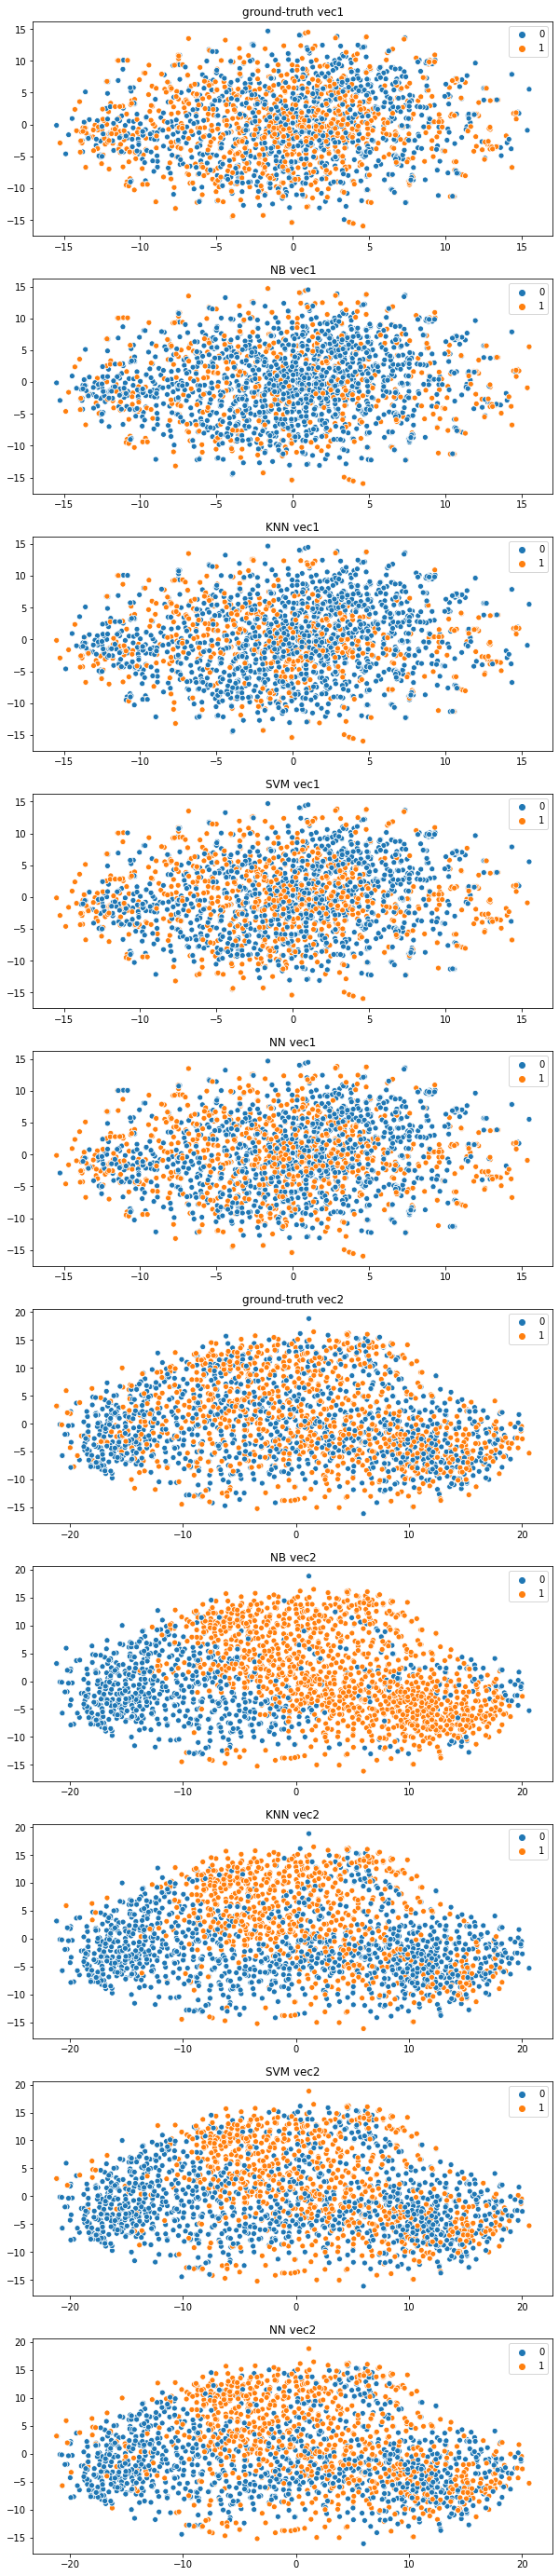

In [85]:
fig, axes = plt.subplots(10, 1, figsize=(10, 50))

sns.scatterplot(ax=axes[0], x = vec1X, y = vec1Y, hue = labelsTest).set(title='ground-truth vec1')
sns.scatterplot(ax=axes[1], x = vec1X, y = vec1Y, hue = prediction[0][0]).set(title='NB vec1')
sns.scatterplot(ax=axes[2], x = vec1X, y = vec1Y, hue = prediction[1][1]).set(title='KNN vec1')
sns.scatterplot(ax=axes[3], x = vec1X, y = vec1Y, hue = prediction[2][1]).set(title='SVM vec1')
sns.scatterplot(ax=axes[4], x = vec1X, y = vec1Y, hue = prediction[3][2]).set(title='NN vec1')

sns.scatterplot(ax=axes[5], x = vec2X, y = vec2Y, hue = labelsTest).set(title='ground-truth vec2')
sns.scatterplot(ax=axes[6], x = vec2X, y = vec2Y, hue = prediction[0][2]).set(title='NB vec2')
sns.scatterplot(ax=axes[7], x = vec2X, y = vec2Y, hue = prediction[1][5]).set(title='KNN vec2')
sns.scatterplot(ax=axes[8], x = vec2X, y = vec2Y, hue = prediction[2][4]).set(title='SVM vec2')
sns.scatterplot(ax=axes[9], x = vec2X, y = vec2Y, hue = prediction[3][5]).set(title='NN vec2')

<div align= "justify" dir="rtl">
<font face="XB Zar" size=3>
    <h1>خوشه بندی
    </h1>
    در این بخش، می‌خواهیم به کمک الگوریتم‌های خوشه‌بندی، فیلم‌های خود را بر اساس نام و توضیحاتشان خوشه‌بندی کرده و عملکرد این خوشه‌بند‌ها را بر حسب برچسب ژانر با یکدگیر مقایسه کنیم. 
</font>
</div>

<div align= "justify" dir="rtl">
<font face="XB Zar" size=3>
    <h2>
        پیاده‌سازی خوشه‌بندها
    </h2>
    مانند بخش دسته‌بندی، پیاده‌سازی مربوط به هر کدام از الگوریتم‌های زیر را در 
    <code style="font-size:0.9em">src.clustering</code>
    به صورت گفته شده تکمیل کرده و با اعتبارسنجی الگوریتم‌ها با هایپرپارامتر‌های مختلف بر روی داده‌های آموزش، بهترین تنظیمات هر الگوریتم را در دو نمایش برداری بدست آورید.
برای سنجش عملکرد خوشه‌بندها از معیار <a href="https://stats.stackexchange.com/a/154379">Purity</a>  برحسب <b>برچسب ژانر</b>
    استفاده کنید. 
    <br>
    با توجه به اینکه الگوریتم‌های خوشه‌بندی لزوما قابلیت پیش‌بینی داده‌های جدید را ندارند، برای اعتبارسنجی مدل‌های خود امکان استفاده از داده‌های اعتبار سنجی را نداریم . به همین دلیل مجموعه‌ داده‌های آموزش مورد استفاده در این بخش را از کنار هم گذاشتن دو مجموعه داده‌ی آموزش و اعتبارسنجی بخش قبل تشکیل می‌دهیم.
</font>
</div>

In [87]:
#train_clus = pd.concat([train_split, val_split], axis = 0)

  <div align= "justify" dir="rtl">
<font face="XB Zar" size=3>
    <h3>K-means
    </h3>
    الگوریتم K-means را در <code style="font-size:0.9em">src.clustering.models</code> از پایه پیاده‌سازی کرده و مقدار بهینه برای هایپرپرامتر‌های این خوشه‌بند (تعداد خوشه‌ها، تعداد گام‌ها و ...) را بر حسب معیار Purity  بدست‌ آورده و در نهایت بهترین تنظیمات و میزان عملکرد مربوط به آن را در کد زیر گزارش کنید.
     برای یادآوری شیوه‌ی عملکرد این الگوریتم می‌توانید
    <a href="https://medium.com/capital-one-tech/k-means-clustering-algorithm-for-machine-learning-d1d7dc5de882">
    این مقاله
    </a>
را بررسی کنید.
    <br>
    <b>توجه:</b>
    از آنجایی که برای بدست‌ آوردن بهترین پارامترها نیاز به محاسبه‌ی Purity دارید تابع مربوط به این معیار را در  <code style="font-size:0.9em">src.clustering.evaluation</code> تکمیل کنید.
    </font>
</div>

In [5]:
numbers = [8, 12]
iterations = [25, 50]
prediction2[0] = [list()] * 8
for i in range(8):
    prediction2[0][i] = []
pi = 0
maximum = 0
for n in numbers:
    for it in iterations:
        KMmodel1 = clustering.KMeans(n, it)
        KMmodel1.fit(vec1Train)
        for j in range(len(vec1Train)):
            l = KMmodel1.predict(vec1Train[j])
            prediction2[0][pi].append(l)
        purity = clustering.evaluation.purity(genreTrain, prediction2[0][pi])
        print('purity vec1 for cluster number = '+ str(n)+', iteration number = ' + str(it) +' is '+str(purity))
        if purity > maximum:
            maximum = purity
            bestN1 = n
            bestIT1 = it
        pi+=1
print('best purity for vec1 is '+str(maximum))


maximum2 = 0
for n in numbers:
    for it in iterations:
        KMmodel2 = clustering.KMeans(n, it)
        KMmodel2.fit(vec2Train)
        for j in range(len(vec2Train)):
            l = KMmodel2.predict(vec2Train[j])
            prediction2[0][pi].append(l)
        purity = clustering.evaluation.purity(genreTrain, prediction2[0][pi])
        print('purity vec2 for cluster number = '+ str(n)+', iteration number = ' + str(it) +' is '+str(purity))
        if purity > maximum2:
            maximum2 = purity
            bestN2 = n
            bestIT2 = it
        pi+=1
print('best purity for vec2 is '+str(maximum2))
        
if maximum > maximum2:
    print('best setting is vec1 with cluster number = '+ str(bestN1)+', iteration number = ' + str(bestIT1))
else:
    print('best setting is vec2 with cluster number = '+ str(bestN2)+', iteration number = ' + str(bestIT2))
# todo: fit & validate the model to achieve the best purity on training data (vec_1 & vec_2)
# todo: report best settings
# target purity for vec_1>=0.23, and for vec_2>=0.30 

purity vec1 for cluster number = 8, iteration number = 25 is 0.22666548703883924
purity vec1 for cluster number = 8, iteration number = 50 is 0.22516146155887817
purity vec1 for cluster number = 12, iteration number = 25 is 0.24719101123595505
purity vec1 for cluster number = 12, iteration number = 50 is 0.24303282314429797
best purity for vec1 is 0.24719101123595505
purity vec2 for cluster number = 8, iteration number = 25 is 0.29841634964168806
purity vec2 for cluster number = 8, iteration number = 50 is 0.3118641068742812
purity vec2 for cluster number = 12, iteration number = 25 is 0.3263735291515527
purity vec2 for cluster number = 12, iteration number = 50 is 0.31655312748827746
best purity for vec2 is 0.3263735291515527
best setting is vec2 with cluster number = 12, iteration number = 25


  <div align= "justify" dir="rtl">
<font face="XB Zar" size=3>
    <h3>Gaussian Mixture Models
    </h3>
    الگوریتم GMM را در 
    <code style="font-size:0.9em">src.clustering.models</code>
    با استقاده از کتابخانه‌های موجود (مانند 
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html">sklean</a>)
    پیاده‌سازی کرده و مقدار بهینه برای هایپرپرامتر‌های این خوشه‌بند (تعداد خوشه‌ها، تعداد گام‌ها و ...) را بدست‌ آورده و در نهایت بهترین تنظیمات و میزان عملکرد مربوط به آن را در کد زیر گزارش کنید. در صورتی که به شیوه‌ی پیاده‌سازی این الگوریتم علاقه دارید می‌توانید به این <a href="https://towardsdatascience.com/gaussian-mixture-modelling-gmm-833c88587c7f">مقاله</a> مراجعه کنید.
    </font>
</div>

In [9]:
param_grid = dict(
    # cluster_count = [potential choices], 
    # max_iters = [potential choices],
    # other hyperparameters to search over (if any)
)
numbers = [8, 12]
iterations = [50, 100]
prediction2[1] = []
maximum = 0
pi = 0
for n in numbers:
    for it in iterations:
        GMMmodel1 = clustering.GMM(n, it)
        GMMmodel1.fit(vec1Train)
        l = GMMmodel1.predict(vec1Train)
        prediction2[1].append(l)
        purity = clustering.evaluation.purity(genreTrain, prediction2[1][pi])
        print('purity vec1 for cluster number = '+ str(n)+', iteration number = ' + str(it) +' is '+str(purity))
        if purity > maximum:
            maximum = purity
            bestN1 = n
            bestIT1 = it
        pi+=1
print('best purity for vec1 is '+str(maximum))

maximum2 = 0
for n in numbers:
    for it in iterations:
        GMMmodel2 = clustering.GMM(n, it)
        GMMmodel2.fit(vec2Train)
        l = GMMmodel2.predict(vec2Train)
        prediction2[1].append(l)
        purity = clustering.evaluation.purity(genreTrain, prediction2[1][pi])
        print('purity vec2 for cluster number = '+ str(n)+', iteration number = ' + str(it) +' is '+str(purity))
        if purity > maximum2:
            maximum2 = purity
            bestN2 = n
            bestIT2 = it
        pi+=1
print('best purity for vec2 is '+str(maximum2))
        
if maximum > maximum2:
    print('best setting is vec1 with cluster number = '+ str(bestN1)+', iteration number = ' + str(bestIT1))
else:
    print('best setting is vec2 with cluster number = '+ str(bestN2)+', iteration number = ' + str(bestIT2))

# todo: fit & validate the model to achieve the best purity on training data (vec_1 & vec_2)
# todo: report best settings
# target purity for vec_1>=0.24, and for vec_2>=0.28 

purity vec1 for cluster number = 8, iteration number = 50 is 0.22701937538706538
purity vec1 for cluster number = 8, iteration number = 100 is 0.22480757321065203
purity vec1 for cluster number = 12, iteration number = 50 is 0.24949128549942493
purity vec1 for cluster number = 12, iteration number = 100 is 0.2725825002211802
best purity for vec1 is 0.2725825002211802
purity vec2 for cluster number = 8, iteration number = 50 is 0.2601964080332655
purity vec2 for cluster number = 8, iteration number = 100 is 0.25117225515349906


C:\Users\MS\anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


purity vec2 for cluster number = 12, iteration number = 50 is 0.31230646730956385
purity vec2 for cluster number = 12, iteration number = 100 is 0.3006281518181014
best purity for vec2 is 0.31230646730956385
best setting is vec2 with cluster number = 12, iteration number = 50


  <div align= "justify" dir="rtl">
<font face="XB Zar" size=3>
    <h3>Hierarchical Clustering
    </h3>
    الگوریتم سلسله مراتبی را در 
    <code style="font-size:0.9em">src.clustering.models</code>
    با استقاده از کتابخانه‌های موجود (مانند 
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html">sklean</a>)
    پیاده‌سازی کرده و مقدار بهینه برای هایپرپرامتر‌های این خوشه‌بند (تعداد خوشه‌ها و ...) را بدست‌ آورده 
   و در نهایت بهترین تنظیمات و میزان عملکرد مربوط به آن را در کد زیر گزارش کنید.
    </font>
</div>

In [7]:
param_grid = dict(
    #cluster_count = [potential choices],
    # other hyper-parameters to search over (if any)
)
numbers = [8, 12]
prediction2[2] = []
maximum = 0
pi = 0
for n in numbers:
    Hmodel1 = clustering.Hierarchical(n)
    l = Hmodel1.fit_predict(vec1Train)
    prediction2[2].append(l)
    purity = clustering.evaluation.purity(genreTrain, prediction2[2][pi])
    print('purity vec1 for cluster number = '+ str(n)+' is '+str(purity))
    if purity > maximum:
        maximum = purity
        bestN1 = n
    pi+=1
print('best purity for vec1 is '+str(maximum))
maximum2 = 0
for n in numbers:
    Hmodel2 = clustering.Hierarchical(n)
    l = Hmodel2.fit_predict(vec2Train)
    prediction2[2].append(l)
    purity = clustering.evaluation.purity(genreTrain, prediction2[2][pi])
    print('purity vec2 for cluster number = '+ str(n)+' is '+str(purity))
    if purity > maximum2:
        maximum2 = purity
        bestN2 = n
    pi+=1
print('best purity for vec2 is '+str(maximum2))
        
if maximum > maximum2:
    print('best setting is vec1 with cluster number = '+ str(bestN1))
else:
    print('best setting is vec2 with cluster number = '+ str(bestN2))

# todo: fit & validate the model to achieve the best purity on training data (vec_1 & vec_2)
# todo: report best settings
# target purity for vec_1>=0.21, and for vec_2>=0.27 

purity vec1 for cluster number = 8 is 0.20383968857825355
purity vec1 for cluster number = 12 is 0.22118021764133416
best purity for vec1 is 0.22118021764133416
purity vec2 for cluster number = 8 is 0.28346456692913385
purity vec2 for cluster number = 12 is 0.2920463593736176
best purity for vec2 is 0.2920463593736176
best setting is vec2 with cluster number = 12


<div align= "justify" dir="rtl">
<font face="XB Zar" size=3>
    <h2>ارزیابی
    </h2>
    با تکمیل 
    <code style="font-size:0.9em">src.clustering.evaluation</code>
    معیار‌های ارزیابی خواسته‌شده زیر را پیاده‌سازی کنید:
    <ul>
        <li> Purity</li>
        <li><a href="https://davetang.org/muse/2017/09/21/adjusted-rand-index/">Adjusted Rand Index</a></li>
    </ul>
    سپس با کمک تابع evaluation عمکرد هر یک از الگوریتم‌های پیاده‌سازی شده را با بهترین تنظیماتی که یافتید بر روی دادگان آموزشی، به دست آورده و جداول زیر را تکمیل کنید. (دقت کنید برای ارزیابی پارامتر‌ها در بخش ‌های قبل تنها از معیار Purity  استفاده کنید)
    <br>
    <b>توجه:</b>
    در پیاده‌سازی معیار‌ها مجاز به استفاده از کتابخانه‌های موجود (مانند 
    <a href="https://scikit-learn.org/stable/modules/model_evaluation.html">sklean</a>)
    هستید.
    </font>
</div>

In [34]:
KM1 = clustering.evaluate(genreTrain, prediction2[0][2])
HI1 = clustering.evaluate(genreTrain, prediction2[2][1])
GMM1 = clustering.evaluate(genreTrain, prediction2[1][2])

KM2 = clustering.evaluate(genreTrain, prediction2[0][6])
HI2 = clustering.evaluate(genreTrain, prediction2[2][3])
GMM2 = clustering.evaluate(genreTrain, prediction2[1][6])

In [35]:
l1 = [list] * 4
l2 = [list] * 4
for i in range(4):
    l2[i] = []
    l1[i] = []
for i in KM1.keys():
    l1[0].append(i)
    l1[1].append(KM1[i])
    l1[2].append(HI1[i])
    l1[3].append(GMM1[i])
    
    l2[0].append(i)
    l2[1].append(KM2[i])
    l2[2].append(HI2[i])
    l2[3].append(GMM2[i])
    
    
df1 = pd.DataFrame (l1).transpose()
df1.columns = ['funcs','K-means','GMM', 'Hierarchical']
df2 = pd.DataFrame (l2).transpose()
df2.columns = ['funcs','K-means','GMM', 'Hierarchical']
print('vec1:')
df1

vec1:


funcs    K-means         GMM Hierarchical
0               purity   0.247191     0.22118     0.249491
1  adjusted_rand_index  0.0248693  0.00200239    0.0352433

In [36]:
df2

funcs   K-means        GMM Hierarchical
0               purity  0.326374   0.292046     0.312306
1  adjusted_rand_index  0.061316  0.0465328    0.0558565

<div align= "justify" dir="rtl">
<font face="XB Zar" size=3>
    <h2>مصور سازی
    </h2>
    در این قسمت، مشابه قسمت قبل، از شما خواسته شده‌است تا خوشه‌بندی‌های بدست آمده در قسمت قبل را در دو بعد مصورسازی کرده تا بتوانید درک بهتری از شیوه‌ی عملکرد این خوشه‌بندها داشته باشید. سعی کنید عملکرد خوشه‌بند‌ها را با یکدیگر مقایسه کرده و نتایج خود را گزارش کنید. برای رسم نمودارها ابتدا بایستی با استفاده از روش‌های کاهش ابعاد 
    <a href="https://medium.com/@aptrishu/understanding-principle-component-analysis-e32be0253ef0">PCA</a>
    و یا 
    <a href="https://medium.com/@violante.andre/an-introduction-to-t-sne-with-python-example-47e6ae7dc58f">tSNE</a> 
    مجموعه داده‌ها را به فضای برداری دو یا سه بعدی ببرید تا امکان مصورسازی فراهم شود. همچنین استفاده از کتابخانه‌های موجود برای کاهش ابعاد و مصورسازی مانعی ندارد.
    </font>
</div>

In [21]:
m = TSNE(learning_rate = 50, random_state=1)
vec1TSNE = m.fit_transform(vec1Train)
vec2TSNE = m.fit_transform(vec2Train)
vec1X = vec1TSNE[:, 0]
vec1Y = vec1TSNE[:, 1]
vec2X = vec2TSNE[:, 0]
vec2Y = vec2TSNE[:, 1]

[Text(0.5, 1.0, 'Hierarchical vec2')]

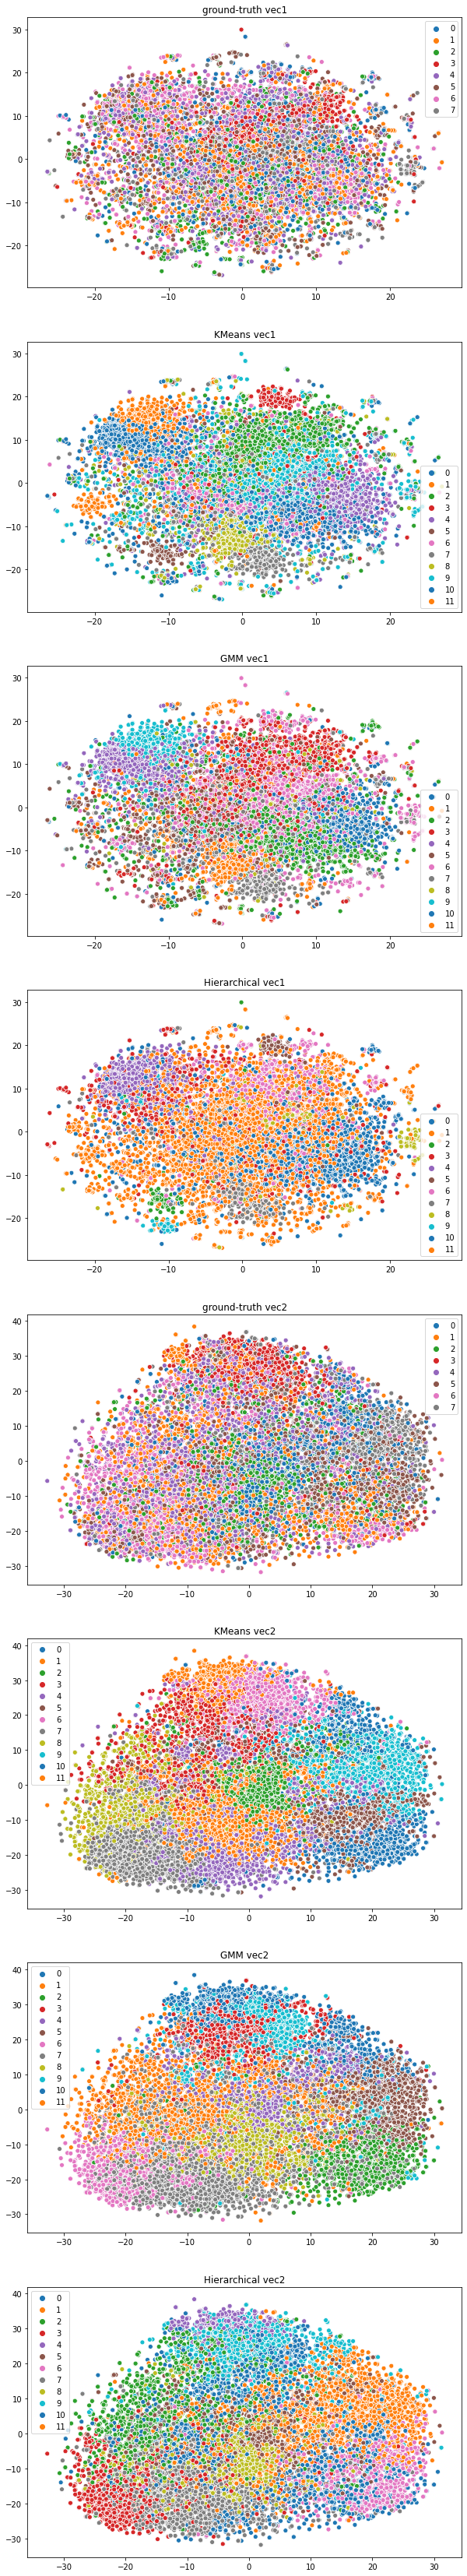

In [33]:
fig, axes = plt.subplots(8, 1, figsize=(10, 60))

sns.scatterplot(ax=axes[0], x = vec1X, y = vec1Y, hue = genreTrain, palette='tab10').set(title='ground-truth vec1')
sns.scatterplot(ax=axes[1], x = vec1X, y = vec1Y, hue = prediction2[0][2], palette='tab10').set(title='KMeans vec1')
sns.scatterplot(ax=axes[2], x = vec1X, y = vec1Y, hue = prediction2[1][2], palette='tab10').set(title='GMM vec1')
sns.scatterplot(ax=axes[3], x = vec1X, y = vec1Y, hue = prediction2[2][1], palette='tab10').set(title='Hierarchical vec1')

sns.scatterplot(ax=axes[4], x = vec2X, y = vec2Y, hue = genreTrain, palette='tab10').set(title='ground-truth vec2')
sns.scatterplot(ax=axes[5], x = vec2X, y = vec2Y, hue = prediction2[0][6], palette='tab10').set(title='KMeans vec2')
sns.scatterplot(ax=axes[6], x = vec2X, y = vec2Y, hue = prediction2[1][6], palette='tab10').set(title='GMM vec2')
sns.scatterplot(ax=axes[7], x = vec2X, y = vec2Y, hue = prediction2[2][3], palette='tab10').set(title='Hierarchical vec2')
